<a href="https://colab.research.google.com/github/vasudev006/S2Codebase/blob/main/Experiment_No_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment No.5

**Calculate and visualise line integrals**

**Aim**

Evaluate the line integral of the vector field along a paramatrized curve

In [15]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Define the parameters
t=sp.symbols('t')

#Define the vector field F(x,y,z) = (P ,Q,R)
x,y,z = sp.symbols('x y z')
P=x*y
Q=y*z
R=z*x

#Define the paramatrized curve r(t) = x(x(t),y(t)
x_t = sp.sin(t)
y_t = sp.cos(t)
z_t=t
#Define the vector field as a function of t along
F=sp.Matrix([P,Q,R])
r_t=sp.Matrix([x_t,y_t,z_t])
F_r_t=F.subs({x:x_t,y:y_t,z:z_t})

#Compute the derivative of r(t) with respect to
dr_t=sp.diff(r_t,t)

#Compute the dot porduct F(r(t)).dr(t)
integrand = F_r_t.dot(dr_t)

#Define the limits of the parameters t
a=0 #Startmof the parameter range
b=sp.pi #End of the paramertr range

#Compute the line integral
line_integral = sp.integrate(integrand,(t,a,b))

#Displkay the result
line_integral

2/3 + 5*pi/4

#Plotting the vector field and the parametrized curve

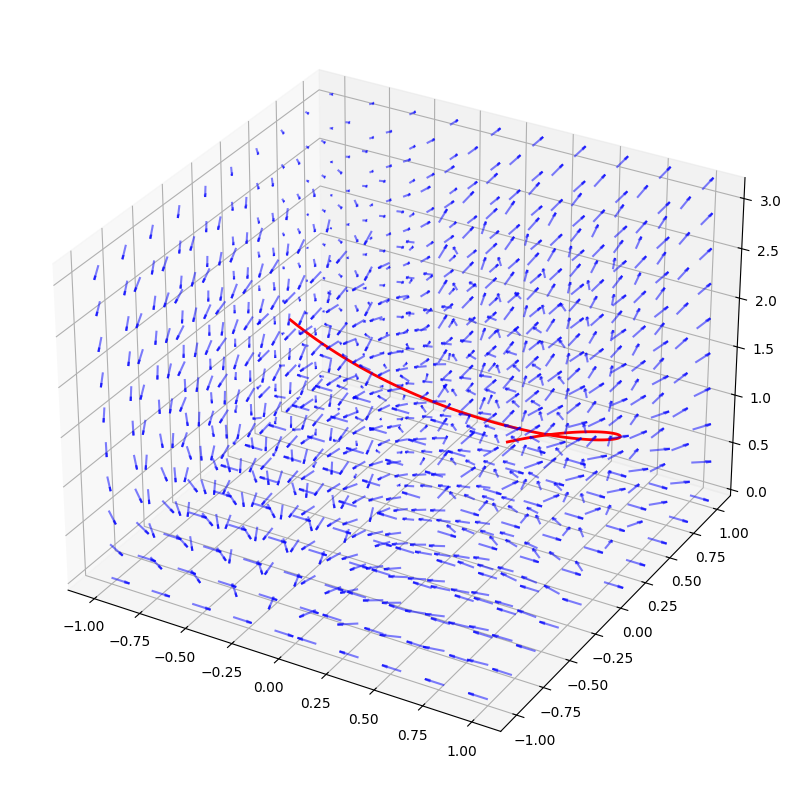

In [18]:
#Compute the vector field at specific points
F_x,F_y,F_z=F
f_func=sp.lambdify((x,y,z),(F_x,F_y,F_z),'numpy')

#Generate a grid ofm points
X,Y,Z =np.meshgrid(np.linspace(-1,1,10),
                   np.linspace(-1,1,10),
                   np.linspace(0,np.pi,10))

#Compute the vector field at the grid point
U,V,W=f_func(X,Y,Z)

#Generate points on the curve
t_vals=np.linspace(0,np.pi,100)
x_curve=np.sin(t_vals)
y_curve=np.cos(t_vals)
z_curve=t_vals

#Plot the vector field
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.quiver(X,Y,Z,U,V,W,length=0.1,normalize=True,
          color='blue',alpha=0.5)

#Plot the  curve
ax.plot(x_curve,y_curve,z_curve,color='red',
        linewidth=2,label='curve r(t)')